In [1]:
import warnings
warnings.filterwarnings('ignore')  # To ignore unnecessary warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [8]:
data_path = "C:\\Users\\ACER\\OneDrive\\Documents\\Python\\Credit risk assessment\\credit_risk.csv"
data = pd.read_csv(data_path)

In [9]:
data.drop(columns=['Id'], inplace=True)

In [10]:
# One-hot encode categorical variables

data = pd.get_dummies(data, columns=['Home', 'Intent', 'Default'])

In [24]:
data.head()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,False,True,False,False,False,False,True,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,True,False,False,True,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,False,False,False,False,False,True,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,False,True,False,False,False,True,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,False,True,False,False,False,True,False,False,False,True


In [25]:
data.describe()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
# Impute missing values with mean strategy

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [12]:
X = data_imputed.drop(columns=['Status'])
y = data_imputed['Status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = rf_model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9174


In [18]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
# Plot Feature Importances

feature_importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(feature_importances)

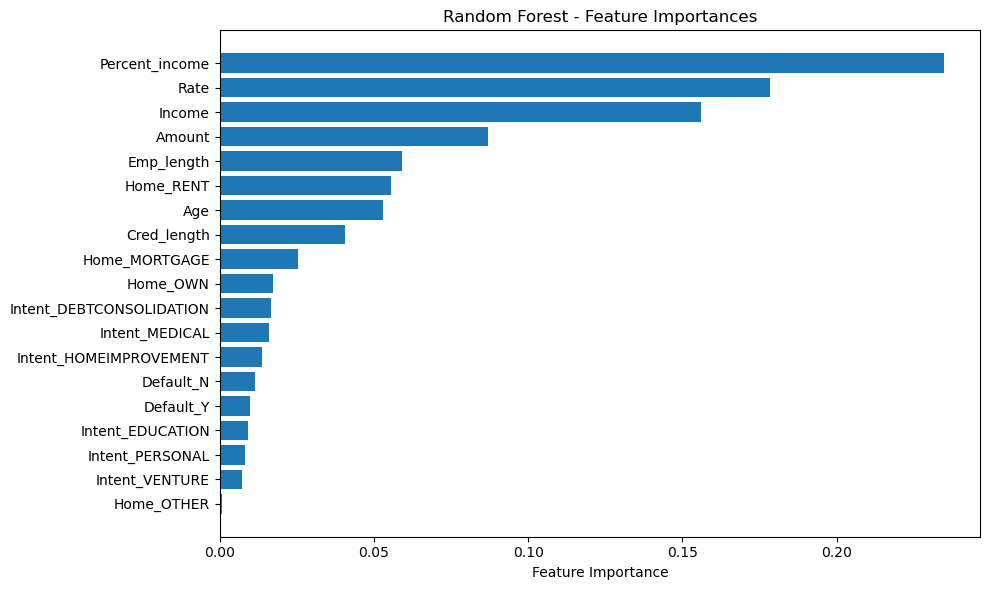

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.tight_layout()
plt.show()

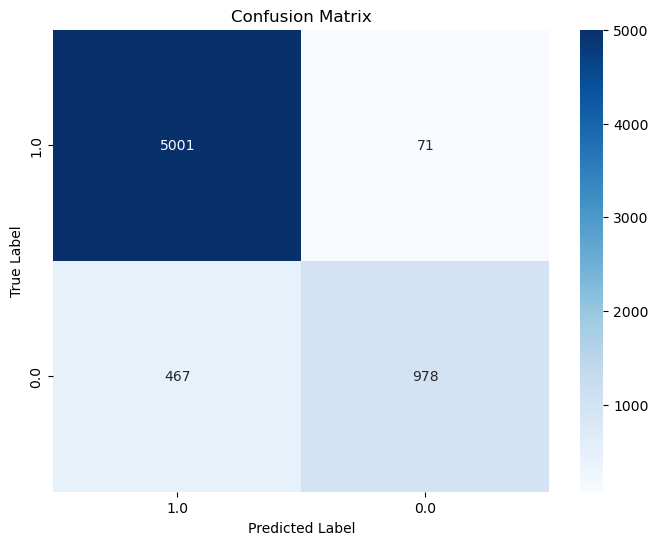

In [21]:
# Plot Confusion Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate detailed classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9174

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      5072
         1.0       0.93      0.68      0.78      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.83      0.87      6517
weighted avg       0.92      0.92      0.91      6517

